<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/AULA_35_AGRUPAMENTO_PARTICIONAL_PRATICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

#### Material de Apoio - Prática sobre Agrupamento Particional de Dados (ver Vídeo)

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

# Importando Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Testando o k-Means

# Exemplo 1

In [ ]:
dados1 = pd.read_csv('kmeans_exemplo1.csv')
dados1

,0,1
0,-7.167747,-8.041066
1,-11.333980,-4.972949
2,-6.110500,-3.190836
3,-5.749076,-3.014832
4,-1.953245,1.158550
...,...,...
995,-6.608557,-4.649171
996,-2.524086,5.145842
997,-1.510280,4.228505
998,-7.217794,-8.237775


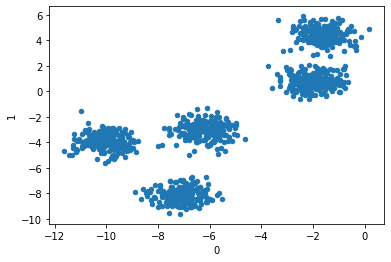

In [ ]:
dados1.plot(kind='scatter',x=0,y=1)

Executando o k-means com a seguinte configuração:
* n_clusters=4 (número de clusters)
* n_init=10 (quantidade de inicializações)
* init='random' (inicialização aleatória dos centroides)
* max_iter=300


In [ ]:
kmeans = KMeans(n_clusters=5,n_init=10,init='random',max_iter=300)
kmeans.fit(dados1)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

Verificando os clusters obtidos

In [ ]:
dados1['cluster'] = kmeans.labels_
dados1

,0,1,cluster
0,-7.167747,-8.041066,1
1,-11.333980,-4.972949,2
2,-6.110500,-3.190836,0
3,-5.749076,-3.014832,0
4,-1.953245,1.158550,4
...,...,...,...
995,-6.608557,-4.649171,0
996,-2.524086,5.145842,3
997,-1.510280,4.228505,3
998,-7.217794,-8.237775,1


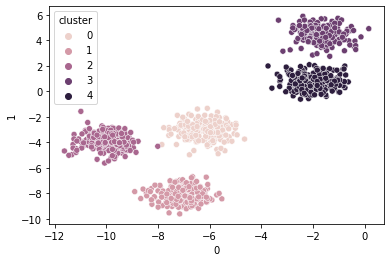

In [ ]:
sns.scatterplot(data=dados1, x='0', y='1', hue="cluster")

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ -6.19501105,  -3.06703734],
       [ -7.06749837,  -8.12644382],
       [-10.00922518,  -3.93249337],
       [ -1.62629066,   4.43032603],
       [ -2.05908444,   0.75732081]])

In [ ]:
# Erro quadrático
E = kmeans.inertia_
E

723.6781464843821

Vamos testar uma execução do k-means com finalização prematura, ou seja, o algoritmo finaliza antes de convergir.

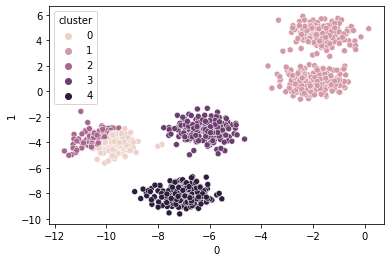

In [ ]:
dados1 = pd.read_csv('kmeans_exemplo1.csv')

kmeans = KMeans(n_clusters=5,n_init=1,init='random',max_iter=2)
kmeans.fit(dados1)

dados1['cluster'] = kmeans.labels_

sns.scatterplot(data=dados1, x='0', y='1', hue="cluster")

# Exemplo 2

In [ ]:
dados2 = pd.read_csv('kmeans_exemplo2.csv')
dados2

,x,y
0,15.42,17.05
1,14.42,16.60
2,13.87,16.45
3,12.47,15.80
4,11.17,14.30
...,...,...
328,19.77,11.75
329,19.62,12.75
330,19.22,10.60
331,20.62,9.40


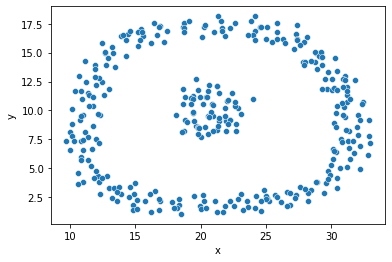

In [ ]:
sns.scatterplot(data=dados2, x='x', y='y')

In [ ]:
kmeans = KMeans(n_clusters=2,n_init=10,init='random',max_iter=300)
kmeans.fit(dados2)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
dados2['cluster'] = kmeans.labels_

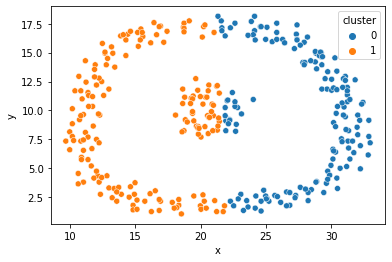

In [ ]:
sns.scatterplot(data=dados2, x='x', y='y', hue="cluster")

In [ ]:
kmeans.cluster_centers_

array([[27.52597454,  9.72075472],
       [15.82488475,  9.14310345]])

# Exemplo 3

In [ ]:
dados3 = pd.read_csv('kmeans_exemplo3.csv')
dados3

,x,y
0,5.52,15.95
1,4.02,15.05
2,3.27,13.10
3,3.17,11.35
4,3.02,9.80
...,...,...
458,22.27,15.75
459,22.97,16.45
460,22.97,16.45
461,21.37,17.40


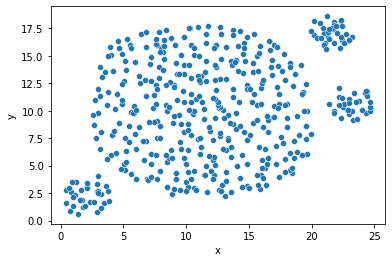

In [ ]:
sns.scatterplot(data=dados3, x='x', y='y')

In [ ]:
kmeans = KMeans(n_clusters=4,n_init=10,init='random',max_iter=300)
kmeans.fit(dados3)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
dados3['cluster'] = kmeans.labels_

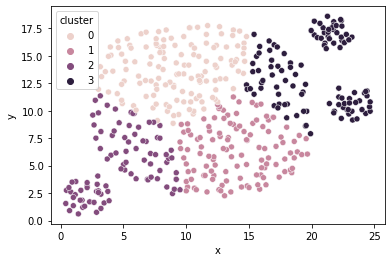

In [ ]:
sns.scatterplot(data=dados3, x='x', y='y', hue="cluster")

Vamos tentar mitigar esse problema, aumentando o número de clusters!

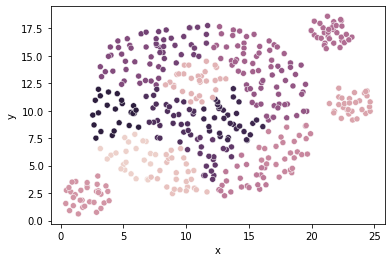

In [ ]:
dados3 = pd.read_csv('kmeans_exemplo3.csv')

kmeans = KMeans(n_clusters=16,n_init=10,init='random',max_iter=300)
kmeans.fit(dados3)

dados3['cluster'] = kmeans.labels_

sns.scatterplot(data=dados3, x='x', y='y', hue="cluster", legend=None)

# Exemplo 4

Conjunto de dados com sete tipos diferentes de grãos de feijão secos, levando em consideração as características como forma, formato, tipo e estrutura. Um sistema de visão computacional foi desenvolvido para distinguir sete diferentes variedades registradas de feijão seco com características semelhantes. Imagens de 13.611 grãos de 7 diferentes grãos secos registrados foram tiradas com uma câmera de alta resolução.


Koklu, Murat, and Ilker Ali Ozkan. "Multiclass classification of dry beans using computer vision and machine learning techniques." Computers and Electronics in Agriculture 174 (2020): 105507.

In [ ]:
df = pd.read_csv('kmeans_exemplo4_drybean.csv')
df

,Extent,Solidity,roundness,Compactness,Class
0,0.763923,0.988856,0.958027,0.913358,SEKER
1,0.783968,0.984986,0.887034,0.953861,SEKER
2,0.778113,0.989559,0.947849,0.908774,SEKER
3,0.782681,0.976696,0.903936,0.928329,SEKER
4,0.773098,0.990893,0.984877,0.970516,SEKER
...,...,...,...,...,...
13606,0.714574,0.990331,0.916603,0.801865,DERMASON
13607,0.799943,0.990752,0.922015,0.822252,DERMASON
13608,0.729932,0.989899,0.918424,0.822730,DERMASON
13609,0.705389,0.987813,0.907906,0.817457,DERMASON


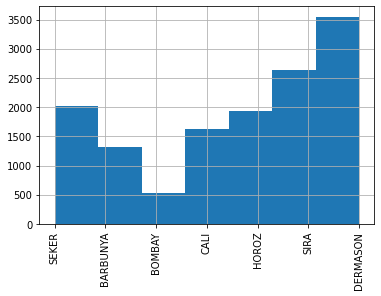

In [ ]:
df.Class.hist(bins=7,xrot=90)

Vamos verificar se o k-means consegue capturar, de forma não supervisionada, grupos de sementes com características similares.

In [ ]:
dados4 = df.copy()
del dados4['Class']

In [ ]:
kmeans = KMeans(n_clusters=7,n_init=10,init='random',max_iter=300)
kmeans.fit(dados4)
dados4['cluster'] = kmeans.labels_


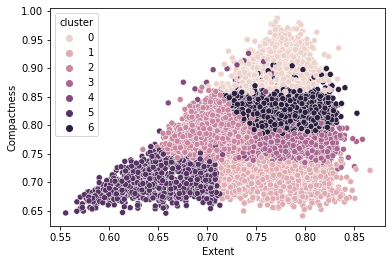

In [ ]:
sns.scatterplot(data=dados4, x='Extent', y='Compactness', hue="cluster")

In [ ]:
df['cluster'] = kmeans.labels_
df.head(30)

,Extent,Solidity,roundness,Compactness,Class,cluster
0,0.763923,0.988856,0.958027,0.913358,SEKER,0
1,0.783968,0.984986,0.887034,0.953861,SEKER,0
2,0.778113,0.989559,0.947849,0.908774,SEKER,0
3,0.782681,0.976696,0.903936,0.928329,SEKER,0
4,0.773098,0.990893,0.984877,0.970516,SEKER,0
5,0.775688,0.989510,0.943852,0.923726,SEKER,0
6,0.762402,0.984081,0.853080,0.933374,SEKER,0
7,0.770682,0.989367,0.967109,0.925480,SEKER,0
8,0.771561,0.988436,0.954240,0.925658,SEKER,0
9,0.783683,0.990810,0.970278,0.912125,SEKER,0


In [ ]:
df.tail(30)

,Extent,Solidity,roundness,Compactness,Class,cluster
13581,0.726289,0.992099,0.916799,0.803619,DERMASON,2
13582,0.800222,0.989098,0.880009,0.783366,DERMASON,3
13583,0.685021,0.992198,0.900578,0.789277,DERMASON,2
13584,0.812403,0.990956,0.910814,0.813046,DERMASON,6
13585,0.736610,0.986033,0.901775,0.819866,DERMASON,6
13586,0.800088,0.992957,0.910810,0.802259,DERMASON,6
13587,0.669202,0.981719,0.843803,0.771675,DERMASON,2
13588,0.753657,0.984234,0.854823,0.784030,DERMASON,3
13589,0.710094,0.989408,0.888477,0.789715,DERMASON,2
13590,0.764711,0.990862,0.922753,0.805745,DERMASON,6


# Informações complementares

Existem dezenas de algoritmos de agrupamento!
Iremos estudar mais alguns na aula sobre agrupamento em grandes bases de dados.

Para quem quiser se aprofundar nesse tema, verificar a seção de Overview of Clustering Methods.

https://scikit-learn.org/stable/modules/clustering.html